In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import RobustScaler

In [106]:
dataset = pd.read_csv("data/cleanDataset.csv")
dataset.head()

,Id,SquareFootage,TotalRooms,SalePrice
0,1,4276,6,208500.0
1,2,3786,5,181500.0
2,3,4492,6,223500.0
3,4,4190,4,140000.0
4,5,5541,7,250000.0


### Splitting data

In [113]:
X = dataset.drop(columns = ['Id', "SalePrice"])
y = dataset['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=15)

### Fitting, Predictions and Plots

In [114]:
regressor = LinearRegression().fit(X_train, y_train)

In [115]:
y_test_pred = regressor.predict(X_test)

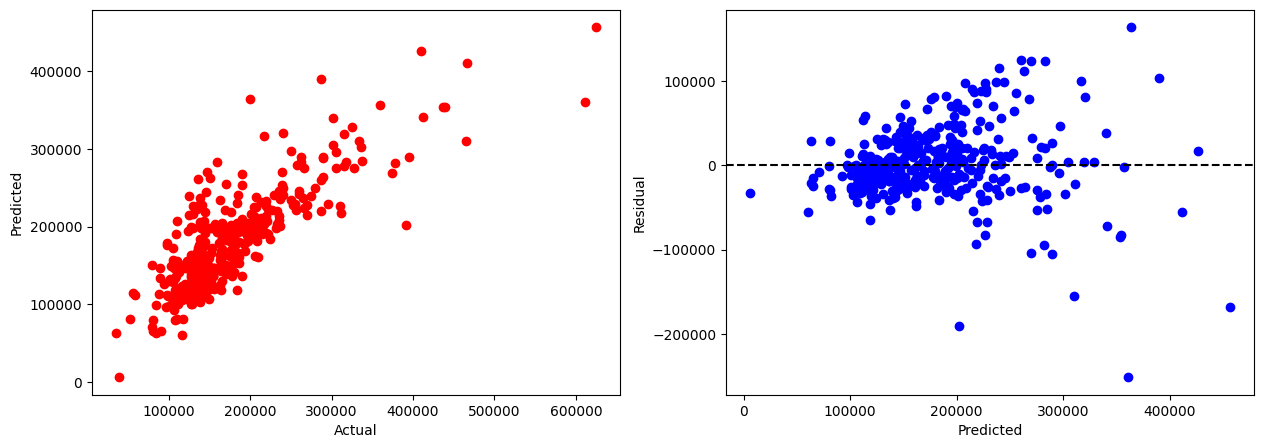

In [116]:
# Actual vs predicted
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(y_test, y_test_pred, color= 'red')
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Residual Plot
plt.subplot(1,2,2)
plt.scatter(y_test_pred, y_test_pred-y_test, color= 'blue')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0, color='black', linestyle='--')

### Error and Accuracy calculation 

In [123]:
mae = mean_absolute_error(y_test,y_test_pred)

In [118]:
print("Average error in my predictions: " + str((mae / y_test.mean()) * 100) + "%")
print("R2_Score of model is:",r2_score(y_test,y_test_pred))

Average error in my predictions: 17.14024501324131%
R2_Score of model is: 0.6711538825114882


#### Saving final predictions

In [125]:
final = pd.read_csv("data/finalTestDataset.csv")
X_final = final.drop(columns = 'Id')
final['SalePrice'] = np.floor(regressor.predict(X_final))

In [130]:
submission = final.drop(columns=['SquareFootage', 'TotalRooms'])
submission.to_csv("submission.csv", index=False)